In [1]:
# Code to make Fig S24 --- species~Volume

In [2]:
from __future__ import division
import  matplotlib.pyplot as plt

import pandas as pd
import linecache
import numpy as np
import os
import sys
import scipy.stats as stats

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table

In [3]:
def sar_ci_pi(dt,type, fillcolor,edgecolor,transparency,includePI,includeCI,md,legendtitle):
    dt['x']= np.log10(dt['volume.filtered.in.L'])
    dt['y'] = np.log10(dt[type])
    regfit = smf.ols('y ~ x',dt).fit()
    r2 = regfit.rsquared
    params = regfit.params
    a=params[0]
    b = params[1]
    st, data, ss2 = summary_table(regfit, alpha =0.05)
    print type
    print regfit.summary()

    fittedvalues = data[:,2]
    predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T	

    data_intervals = {'x': dt['x'], 'predict_low': predict_ci_low, 'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 'conf_high': predict_mean_ci_upp}
    df_intervals = pd.DataFrame(data=data_intervals)
    df_intervals_sort = df_intervals.sort_values(by='x')

    for kind in md:
        d = dt.loc[dt['primer']==kind]
        plt.scatter(d.x, d.y,marker = md[kind],color = fillcolor, alpha= transparency , s = 25, linewidths=0.5, edgecolor=edgecolor,label=None)		
    plt.plot(dt['x'], fittedvalues, '-', lw=2, color = fillcolor, label=legendtitle)

    if 'yes' in includePI:
        plt.plot(df_intervals_sort['x'], df_intervals_sort['predict_low'], '--', lw=1, color = fillcolor)
        plt.plot(df_intervals_sort['x'], df_intervals_sort['predict_upp'], '--', lw=1, color = fillcolor)
    if 'yes' in includeCI:
        plt.fill_between(df_intervals_sort['x'], df_intervals_sort['conf_high'], df_intervals_sort['conf_low'], color=fillcolor, alpha = 0.5,lw=0.0)

    return r2, a, b


In [4]:
def plot_SAR():
    fig = plt.figure(figsize=(11.69,8.27))
    fs = 8 # font size used across figures

    plt.ylim(1, 5.5)
    plt.xlim(-1, 5.5)
    
    df = pd.read_csv(mydir + 'data/SubsurfaceVolumes/OTU_S_Ncells.csv')
    
    mkr_dict = {'v1v3': 'h', 'v3v5': '+', 'v4v5': '^', 'v6':'o','v6v4':'D'}
    ClosedSARR2, ClosedSARA, ClosedSARB= sar_ci_pi(df,'closedref','maroon','Crimson',0.75,'no','yes',mkr_dict,r'closed reference OTUs; $R^2=0.21$')
    ClosedSARR2, ClosedSARA, ClosedSARB= sar_ci_pi(df,'openref','lightcoral','Crimson',0.75,'no','yes',mkr_dict,r'open reference OTUs; $R^2=0.20$')

    plt.xlabel('Volume in L, $log$'+r'$_{10}$'+'($V$)', fontsize=fs+2)
    plt.ylabel('$log$'+r'$_{10}$'+"($S'$)", fontsize=fs+2)
    plt.tick_params(axis='both', which='major', labelsize=fs-3)
    plt.legend(fontsize=fs,loc='lower right')
    plt.show()

closedref
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     13.36
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           0.000625
Time:                        15:47:43   Log-Likelihood:                -44.878
No. Observations:                  51   AIC:                             93.76
Df Residuals:                      49   BIC:                             97.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6573      0.090     29.38

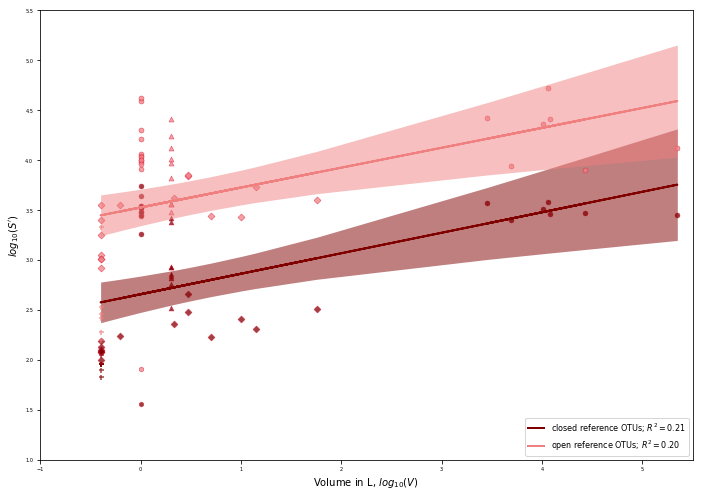

In [5]:
mydir = os.path.expanduser("~/Desktop/ScalingMicroBiodiversity-master/")
plot_SAR()